<a href="https://colab.research.google.com/github/kmendesDev/project_titanic/blob/main/data_cleaning_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Titanic - Data Cleaning

## Introdução

👋🛳️ Olá, seja bem-vindo ao Desafio Titanic Kaggle! Esta é a lendária competição de Machine Learning do Titanic - o melhor e primeiro desafio de ML no Kaggle.

Esse projeto foi desenvolvido em colaboração com os Cientistas de Dados:

:iphone: Developers contacts

Kaio Mendes - [![General badge](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white<SUBJECT>-<STATUS>-<COLOR>.svg)](https://www.linkedin.com/in/kaio-mendes-bba196150)  -  [![General badge](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white<SUBJECT>-<STATUS>-<COLOR>.svg)](https://github.com/kmendesDev)

Cassio Viana - [![General badge](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white<SUBJECT>-<STATUS>-<COLOR>.svg)](https://www.linkedin.com/in/cvs1987)  -  [![General badge](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white<SUBJECT>-<STATUS>-<COLOR>.svg)](https://github.com/cvs2010)


O objetivo desse projeto é utilizar aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.

O Desafio: O naufrágio do Titanic é um dos naufrágios mais infames da história. Em 15 de abril de 1912, durante sua viagem inaugural, o RMS Titanic, amplamente considerado "inafundável", afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora tenha havido algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

Neste projeto, iremos desenvolver um modelo preditivo de Machine Learning que responda à pergunta: "que tipo de pessoas tinham mais probabilidade de sobreviver?" usando dados dos passageiros (como nome, idade, gênero, classe socioeconômica, etc).

Quais Dados foram usados?
Dois conjuntos de dados semelhantes que incluem informações dos passageiros, como nome, idade, gênero, classe socioeconômica, etc. Um conjunto de dados é intitulado train.csv e o outro é intitulado test.csv.

O train.csv contém os detalhes de um subconjunto dos passageiros a bordo (exatamente 891) e, o que é mais importante, revelará se eles sobreviveram ou não, também conhecido como "verdade básica". Já o conjunto de dados test.csv contém informações semelhantes, mas não revela a "verdade básica" para cada passageiro. Sua tarefa é prever esses resultados.

Usando os padrões encontrados nos dados do train.csv, prevemos se os 418 passageiros a bordo (encontrados no test.csv) sobreviveram.

Confira a pasta "data" para explorar ainda mais os conjuntos de dados.

https://www.kaggle.com/competitions/titanic/overview/description


##Importação de bibliotecas

In [1]:
import pandas as pd # Para manusear dados tabulares
import seaborn as srn # Para gráficos estatísticos
import statistics as sts # Para cálculos matemáticos
import numpy as np # Para operações numéricas
import seaborn as sns # Para visualização de dados estatísticos
import matplotlib.pyplot as plt # Para criação de gráficos
from sklearn.preprocessing import LabelEncoder # Para codificar colunas

##Importação dos dados

In [2]:
# Baixar arquivos salvos no github
!wget https://github.com/kmendesDev/project_titanic/raw/main/data/train.csv
!wget https://github.com/kmendesDev/project_titanic/raw/main/data/test.csv
dataset_test = pd.read_csv("/content/test.csv")
dataset_train = pd.read_csv("/content/train.csv")

--2023-09-11 22:09:12--  https://github.com/kmendesDev/project_titanic/raw/main/data/train.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kmendesDev/project_titanic/main/data/train.csv [following]
--2023-09-11 22:09:12--  https://raw.githubusercontent.com/kmendesDev/project_titanic/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2023-09-11 22:09:13 (4.34 MB/s) - ‘train.csv’ saved [61194/61194]

--2023-09-11 22:09:13--  https://github.com/kmend

In [3]:
dataset_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
dataset_train.shape

(891, 12)

In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dataset_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
dataset_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
dataset_test.shape

(418, 11)

In [11]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
dataset_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##Análise exploratória dos dados

### Análise do conjunto de dados de treinamento

In [30]:
#Clonando o DataFrame
training_data = dataset_train
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
# Informa a identificação do passageiro na lista
training_data['PassengerId'].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

<Axes: xlabel='Survived'>

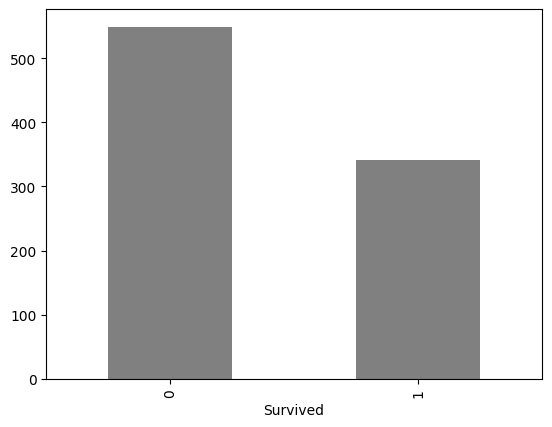

In [32]:
# Coluna Survived:
# Informa a quantidade de 0 e 1 indicando com 1 os que sobreviveram e com 0 os que não conseguiram.
training_data.groupby(['Survived']).size().plot.bar(color='gray')
print("quantidade de sobreviventes: "+str())

In [33]:
# Verificando a quantidade de itens na coluna Survived
training_data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

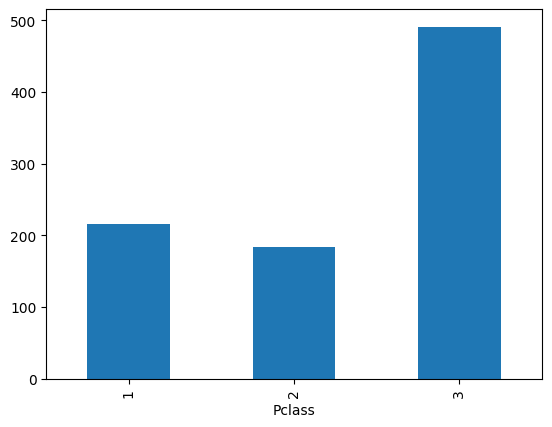

In [34]:
# Coluna Pclass:
# Informa a classe na qual o passageiro viajava:
training_data.groupby(['Pclass']).size().plot.bar('Green')

In [35]:
# Conferindo a quantidade.
training_data['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [37]:
# Conferindo a quantidade.
training_data['Name'].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [38]:
# Coluna sex:
# Informa a quantidade de homens e mulheres:
training_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [39]:
# Conferindo a quantidade.
training_data['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

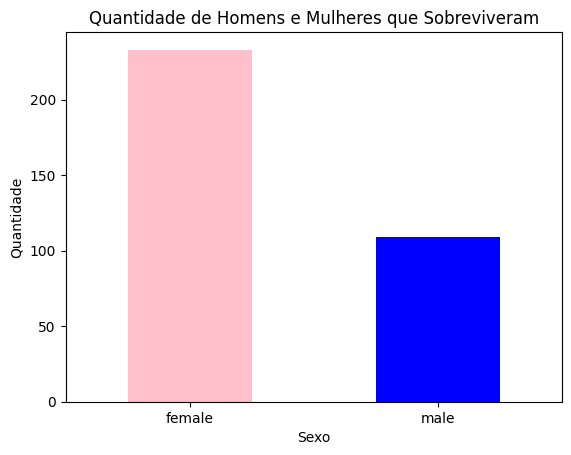

In [88]:
# Calcular a quantidade de homens e mulheres que sobreviveram
sobreviventes_por_sexo = training_data[training_data['Survived'] == 1]['Sex'].value_counts()

# Plotar o gráfico de barras
sobreviventes_por_sexo.plot(kind='bar', color=['pink', 'blue'])
plt.title('Quantidade de Homens e Mulheres que Sobreviveram')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Para manter os rótulos no eixo x na posição horizontal
plt.show()

In [41]:
# Coluna Age:
# Verificar a idade dos passageiros:
training_data['Age'].describe()
# A quantidade está inferior à 891. Logo temos problemas com quantitativo nessa coluna

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<ipython-input-89-44ae0dc19225>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(training_data['Age']).set_title('Age')


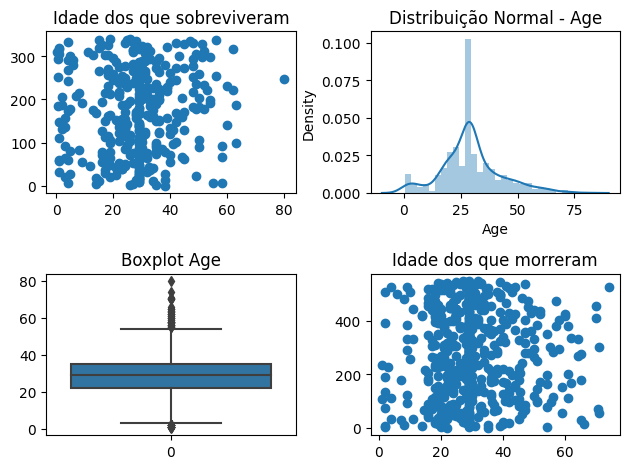

In [89]:
idadevivos = training_data[training_data['Survived'] == 1]['Age']
viveu = training_data.loc[training_data['Survived'] == 1]
viveu=np.arange(0,len(viveu),1)
idademortos = training_data[training_data['Survived'] == 0]['Age']
morreu = training_data.loc[training_data['Survived'] == 0]
morreu=np.arange(0,len(morreu),1)


# Criar quatro gráficos em quadrantes diferentes
plt.figure(1)

# Quadrante superior esquerdo
plt.subplot(2, 2, 1)
plt.scatter(idadevivos, viveu)
plt.title('Idade dos que sobreviveram')

# Quadrante superior direito
plt.subplot(2, 2, 2)
srn.distplot(training_data['Age']).set_title('Age')
plt.title('Distribuição Normal - Age')

# Quadrante inferior esquerdo
plt.subplot(2, 2, 3)
srn.boxplot(training_data['Age']).set_title('Age')
plt.title('Boxplot Age')

# Quadrante inferior direito
plt.subplot(2, 2, 4)
plt.scatter(idademortos, morreu)
plt.title('Idade dos que morreram')

# Ajustar o layout dos gráficos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

In [43]:
print("Quantidade de sobreviventes: "+str(len(idadevivos)))
print("Quantidade de mortos: "+str(len(idademortos)))

Quantidade de sobreviventes: 342
Quantidade de mortos: 549


In [44]:
# Coluna SibSp:
# Informa a quantidade de irmãos e/ou cônjuges à bordo:
training_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [45]:
# Conferindo a quantidade.
training_data['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

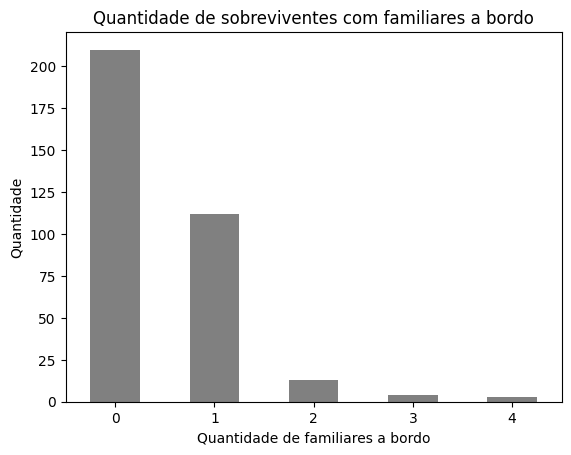

In [95]:
# Calcular a quantidade de sobreviventes com relação a quantidade de familiares a bordo:
sobreviventes_com_familia = training_data[training_data['Survived'] == 1]['SibSp'].value_counts()

# Plotar o gráfico de barras
sobreviventes_com_familia.plot(kind='bar',color='gray')
plt.title('Quantidade de sobreviventes com familiares a bordo')
plt.xlabel('Quantidade de familiares a bordo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Para manter os rótulos no eixo x na posição horizontal
plt.show()

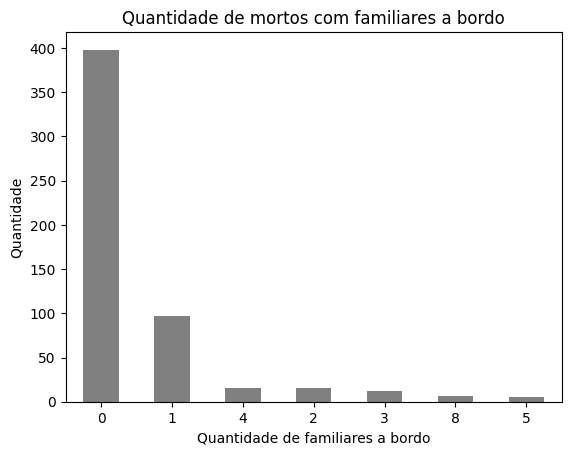

In [97]:
# Calcular a quantidade de mortos com relação a quantidade de familiares a bordo:
sobreviventes_com_familia = training_data[training_data['Survived'] == 0]['SibSp'].value_counts()

# Plotar o gráfico de barras
sobreviventes_com_familia.plot(kind='bar',color='gray')
plt.title('Quantidade de mortos com familiares a bordo')
plt.xlabel('Quantidade de familiares a bordo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Para manter os rótulos no eixo x na posição horizontal
plt.show()

In [46]:
# Coluna Parch:
# Informa a quantidade de pais e/ou filhos à bordo:
training_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [47]:
# Conferindo a quantidade.
training_data['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

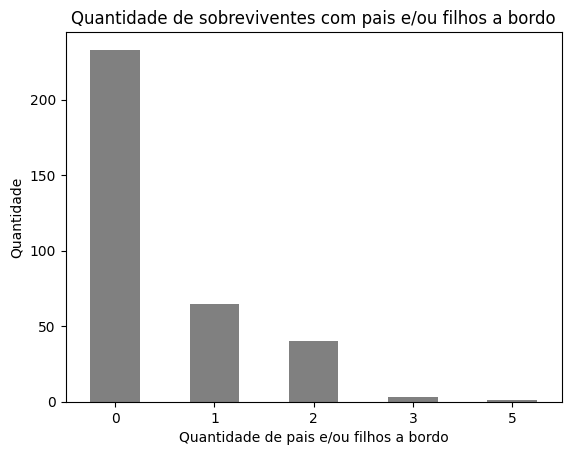

In [100]:
# Calcular a quantidade de sobreviventes com pais e/ou filhos a bordo:
sobreviventes_com_familia = training_data[training_data['Survived'] == 1]['Parch'].value_counts()

# Plotar o gráfico de barras
sobreviventes_com_familia.plot(kind='bar',color='gray')
plt.title('Quantidade de sobreviventes com pais e/ou filhos a bordo')
plt.xlabel('Quantidade de pais e/ou filhos a bordo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Para manter os rótulos no eixo x na posição horizontal
plt.show()

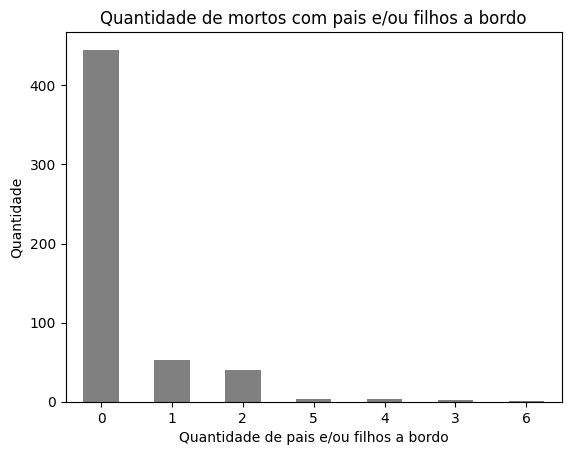

In [99]:
# Calcular a quantidade de mortos com pais e/ou filhos a bordo:
sobreviventes_com_familia = training_data[training_data['Survived'] == 0]['Parch'].value_counts()

# Plotar o gráfico de barras
sobreviventes_com_familia.plot(kind='bar',color='gray')
plt.title('Quantidade de mortos com pais e/ou filhos a bordo')
plt.xlabel('Quantidade de pais e/ou filhos a bordo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Para manter os rótulos no eixo x na posição horizontal
plt.show()

In [48]:
# Coluna Ticket:
# Informa a numeração do Ticket de cada indivíduo:
training_data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [49]:
# Conferindo a quantidade.
training_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [50]:
# Coluna Fare:
# Informa a tarifa paga:
training_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<ipython-input-106-e7c352d930dc>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(training_data['Fare'], training_data['Survived'], c='gray', cmap='viridis')


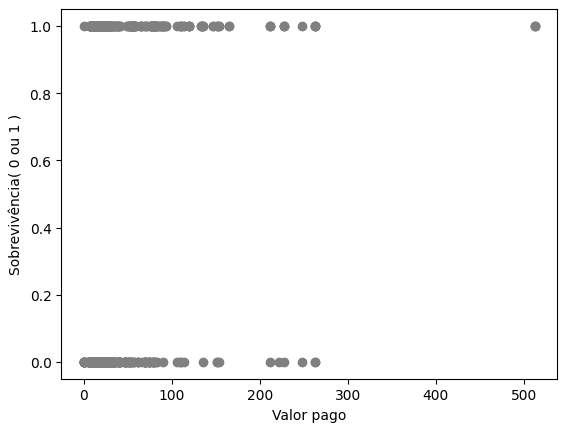

In [106]:

plt.scatter(training_data['Fare'], training_data['Survived'], c='gray', cmap='viridis')

# Definir rótulos dos eixos x e y
plt.xlabel('Valor pago')
plt.ylabel('Sobrevivência( 0 ou 1 )')
plt.show()

<ipython-input-107-011d99239c09>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(training_data['Fare']).set_title('Fare')


Text(0.5, 1.0, 'Distribuição Normal - Fare')

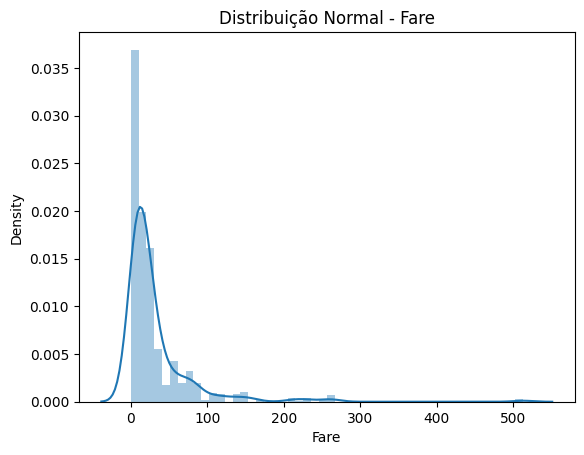

In [107]:
# Distribuiçao normal do valor pago
srn.distplot(training_data['Fare']).set_title('Fare')
plt.title('Distribuição Normal - Fare')

In [51]:
# Coluna Cabin:
# Informa a cabina que o passageiro ocupava:
training_data['Cabin'].value_counts()
# Verifica-se que a cabine mais recorrente é a B96

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [52]:
# Conferindo a quantidade.
training_data['Cabin'].describe()
# Verifica-se que faltam muitos valores. Temos apenas 204 preenchidos

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [53]:
# Coluna Embarked:
# Informa o porto o qual o passageiro embarcou:
training_data['Embarked'].value_counts()
# O Porto de Southampton (S) é o mais recorrente.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
# Conferindo a quantidade.
training_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

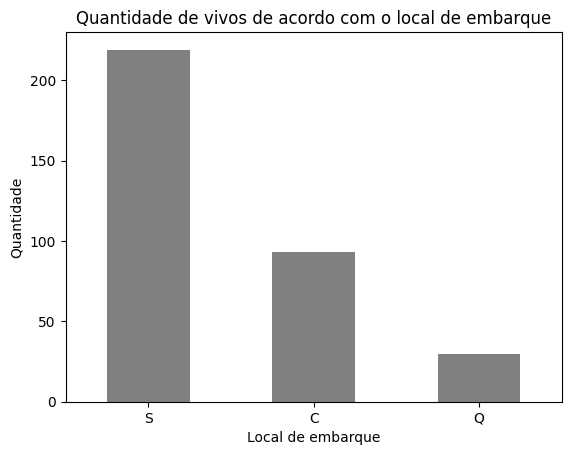

In [108]:
# Calcular a quantidade de vivos de acordo com o local de embarque:
sobreviventes_embarque = training_data[training_data['Survived'] == 1]['Embarked'].value_counts()

# Plotar o gráfico de barras
sobreviventes_embarque.plot(kind='bar',color='gray')
plt.title('Quantidade de vivos de acordo com o local de embarque')
plt.xlabel('Local de embarque')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Para manter os rótulos no eixo x na posição horizontal
plt.show()

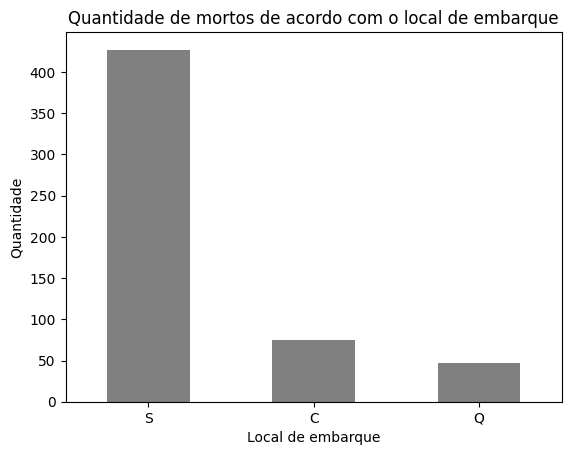

In [109]:
# Calcular a quantidade de mortos de acordo com o local de embarque:
sobreviventes_embarque = training_data[training_data['Survived'] == 0]['Embarked'].value_counts()

# Plotar o gráfico de barras
sobreviventes_embarque.plot(kind='bar',color='gray')
plt.title('Quantidade de mortos de acordo com o local de embarque')
plt.xlabel('Local de embarque')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Para manter os rótulos no eixo x na posição horizontal
plt.show()

Verificação de valores NaN

In [55]:
training_data.isnull().sum()
# Colunas com valores nulos:
# Age
# Cabin
# Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Retirando os valores nulos:

In [56]:
#Substituindo os valores NaN pela média:
training_data['Age'].fillna(int(training_data['Age'].describe()[1]),inplace=True)
int(training_data['Age'].describe()[1])

29

In [57]:
#Verificando a existência de algum valor NaN:
training_data['Age'].isnull().sum()

0

In [58]:
# Coluna Cabin:
training_data['Cabin'].isnull().sum()
#Verifica-se 687 valores nulos, caracterizando mais da metade.

687

In [59]:
# Coluna Embarked:
training_data['Embarked'].isnull().sum()
#Verifica-se 2 valores nulos na coluna Embarked.

2

In [60]:
training_data['Embarked'].fillna('S',inplace=True)

In [61]:
# Verificando se ainda há valores nulos:
training_data['Embarked'].isnull().sum()

0

In [62]:
#Verificando a nova quantidade de dados por variável:
training_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Verificando valores duplicados de algumas colunas: Id, Name e Cabin

In [63]:
# Coluna PassengerId
training_data[training_data.duplicated(['PassengerId'],keep=False)]
# Verifica-se que não há valores duplicados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [64]:
# Coluna Name
training_data[training_data.duplicated(['Name'],keep=False)]
# Verifica-se que não há valores duplicados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [65]:
# Filtra os dados duplicados e não nulos na coluna 'Cabin'
filtered_data_cabin = training_data[training_data['Cabin'].duplicated(keep=False) & training_data['Cabin'].notna()]
# Ordena os dados
filtered_data_cabin = filtered_data_cabin.sort_values(by='Cabin')
# Excluindo o indice
filtered_data_cabin.reset_index(drop=True)
# Exibe os dados
filtered_data_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
...,...,...,...,...,...,...,...,...,...,...,...,...
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S


Alguns passageiros não tem cabine registradas: 687

Alguns passageiros tem cabines duplicadas: 103

Alguns passageiros tem mais de uma cabine registrada, provavelmente cabines conexas: 16

Passageiros registrados na mesma cabine tiveram diferentes taxas de sobrevivência, isso pode evidenciar algo relacionado ao posicionamento da pessoa no momento do naufrágio, ou outra característica como idade, dificuldade de locomoção, etc.

### Análise do conjunto de dados de teste

In [ ]:
#Clonando o DataFrame teste
testing_data = dataset_test
testing_data

In [ ]:
# Informa a identificação do passageiro na lista
testing_data['PassengerId'].describe()

In [ ]:
# Coluna Pclass:
# Informa a classe na qual o passageiro viajava:
testing_data.groupby(['Pclass']).size()

In [ ]:
# Conferindo a quantidade.
testing_data['Pclass'].describe()

In [ ]:
# Conferindo a quantidade.
testing_data['Name'].describe()

In [ ]:
# Coluna sex:
# Informa a quantidade de homens e mulheres:
testing_data['Sex'].value_counts()

In [ ]:
# Conferindo a quantidade.
testing_data['Sex'].describe()

In [ ]:
# Coluna Age:
# Verificar a idade dos passageiros:
testing_data['Age'].describe()
# A quantidade está inferior à 418. Logo temos problemas com quantitativo nessa coluna

In [ ]:
testing_data['Age'].isnull().sum()

In [ ]:
# Coluna SibSp:
# Informa a quantidade de irmãos e/ou cônjuges à bordo:
testing_data['SibSp'].value_counts()

In [ ]:
# Conferindo a quantidade.
testing_data['SibSp'].describe()

In [ ]:
# Coluna Parch:
# Informa a quantidade de pais e/ou filhos à bordo:
testing_data['Parch'].value_counts()

In [ ]:
# Conferindo a quantidade.
testing_data['Parch'].describe()

In [ ]:
# Coluna Ticket:
# Informa a numeração do Ticket de cada indivíduo:
testing_data['Ticket'].value_counts()

In [ ]:
# Conferindo a quantidade.
testing_data['Ticket'].describe()

In [ ]:
# Coluna Fare:
# Informa a tarifa paga:
testing_data['Fare'].describe()

Separar para a parte de tratamento de dados:

In [ ]:
# Coluna Cabin:
# Informa a cabine que o passageiro ocupava:
testing_data['Cabin'].value_counts()
# Verifica-se que a cabine mais recorrente é a B96

In [ ]:
# Conferindo a quantidade.
testing_data['Cabin'].describe()
# Verifica-se que faltam muitos valores. Temos apenas 91 preenchidos

In [ ]:
# Coluna Embarked:
# Informa o porto o qual o passageiro embarcou:
testing_data['Embarked'].value_counts()
# O Porto de Southampton (S) é o mais recorrente.

In [ ]:
# Conferindo a quantidade.
testing_data['Embarked'].describe()

Verificação de valores NaN

In [ ]:
testing_data.isnull().sum()
# Colunas com valores nulos:
# Age
# Fare
# Cabin

Retirando os valores nulos:

In [ ]:
#Substituindo os valores NaN pela média:
testing_data['Age'].fillna(int(testing_data['Age'].describe()[1]),inplace=True)
int(testing_data['Age'].describe()[1])

In [ ]:
#Verificando a existência de algum valor NaN na coluna Age:
testing_data['Age'].isnull().sum()

In [ ]:
# Coluna Fare:
# Substituindo os valores NaN pela média:
testing_data['Fare'].fillna(int(testing_data['Fare'].describe()[1]),inplace=True)

In [ ]:
# Verificando se restam valores nulos:
testing_data['Fare'].isnull().sum()

In [ ]:
# Coluna Cabin:
testing_data['Cabin'].isnull().sum()
#Verifica-se 327 valores nulos, caracterizando mais da metade.

Verificando valores duplicados de algumas colunas: Id, Name e Cabin

In [ ]:
# Coluna PassengerId
testing_data[testing_data.duplicated(['PassengerId'],keep=False)]
# Verifica-se que não há valores duplicados

In [ ]:
# Coluna Name
testing_data[testing_data.duplicated(['Name'],keep=False)]
# Verifica-se que não há valores duplicados

In [ ]:
# Filtra os dados duplicados e não nulos na coluna 'Cabin'
filtered_data_cabin2 = testing_data[testing_data['Cabin'].duplicated(keep=False) & testing_data['Cabin'].notna()]
# Ordena os dados
filtered_data_cabin2 = filtered_data_cabin2.sort_values(by='Cabin')
# Excluindo o indice
filtered_data_cabin2.reset_index(drop=True)
# Exibe os dados
filtered_data_cabin2

In [ ]:
testing_data['Cabin'].isnull().sum()

In [ ]:
filtered_data_cabin2.shape

Alguns passageiros não tem cabine registradas: 327

Alguns passageiros tem cabines duplicadas: 29

Alguns passageiros tem mais de uma cabine registrada, provavelmente cabines conexas: 7

Passageiros registrados na mesma cabine tiveram diferentes taxas de sobrevivência, isso pode evidenciar algo relacionado ao posicionamento da pessoa no momento do naufrágio, ou outra característica como idade, dificuldade de locomoção, etc.

## Pré-processamento, limpeza e tratamento dos dados

### Pré-processamento e limpeza dos dados

In [ ]:
testing_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Existem valores ausentessomente na coluna Cabin.

Vamos proceder com o tratamento dos dados ausentes

In [ ]:
# Substituindo os valores NaN de Cabin por zero:
training_data['Cabin'].fillna(0,inplace=True)
#Verificando a existência de algum valor NaN:
training_data['Cabin'].isnull().sum()

0

In [ ]:
# Substituindo os valores NaN de Cabin por zero:
testing_data['Cabin'].fillna(0,inplace=True)
#Verificando a existência de algum valor NaN:
testing_data['Cabin'].isnull().sum()

0

In [ ]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
training_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,0,S


In [ ]:
testing_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Confirmamos que não há mais nenhum valor ausentes nos dois datasets

### Tratamento dos dados


Agora iremos para a segunda etapa de modificação das colunas com valores não numéricos. Essa etapa é chamada de "codificação" e visa transformar os valores não numéricos em formatos que possam ser interpretados por algoritmos de análise e modelagem. Isso é essencial para garantir que os dados sejam adequados para análises estatísticas e de aprendizado de máquina, permitindo que os modelos compreendam as informações presentes nas colunas não numéricas. Existem várias técnicas de codificação, como a codificação one-hot e a codificação de rótulos, que podem ser aplicadas dependendo das características dos dados e dos objetivos da análise.

#### Vamos proceder com a codificação dos dados do dataset training_data

In [ ]:
# Lista de colunas numéricas
colunas_numericas = training_data.select_dtypes(include=[np.number]).columns.tolist()

# Lista de colunas não numéricas
colunas_nao_numericas = training_data.select_dtypes(exclude=[np.number]).columns.tolist()

print("Colunas Numéricas:")
print(colunas_numericas)

print("\nColunas Não Numéricas:")
print(colunas_nao_numericas)

Colunas Numéricas:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Colunas Não Numéricas:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


A coluna nome não precisa de nenhum tipo de tratamento pois será desconsiderada para a análise do Machine Learning. Vamos prosseguir para as demais colunas.

In [ ]:
# Realizando one-hot encoding na coluna "Sex"
one_hot_encoded = pd.get_dummies(training_data['Sex'], prefix='Sex')

# Adicionando as colunas codificadas ao DataFrame original
training_data = pd.concat([training_data, one_hot_encoded], axis=1)

In [ ]:
# Codificando a coluna Embarked:
one_hot_code = pd.get_dummies(training_data['Embarked'], prefix='Embarked')

training_data = pd.concat([training_data, one_hot_code],axis=1)

training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,1,0,0,1


In [ ]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,0,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0


##### Para as colunas "Ticket" e "Cabin" o trabalho será mais árduo, pois teremos que fazer um pré-processamento antes da codificação, devido a grande quantidade de valores diferenciados nessas colunas, veja:

In [ ]:
# Verificando os valores únicos em "Ticket" e "Cabin"
print('Valores únicos em Ticket:', len(training_data['Ticket'].value_counts()))
print('Valores únicos em Cabin:', len(training_data['Cabin'].value_counts()))

Valores únicos em Ticket: 681
Valores únicos em Cabin: 148


###### Vamos proceder com a transformação da coluna Ticket

In [ ]:
# Criando uma nova coluna "Ticket_value" e outra "Ticket_number"
training_data['Ticket_value'] = training_data['Ticket'].str.split(' ').str[0]
training_data['Ticket_number'] = training_data['Ticket'].str.split(' ').str[1]

# Copiando valores de "Ticket_value" para "Ticket_number" quando estiver com valor NaN
training_data['Ticket_number'].fillna(training_data['Ticket_value'], inplace=True)
for i in range(len(training_data['Ticket_number'])):
  if training_data['Ticket_number'][i].isnumeric() == False:
    training_data['Ticket_number'][i] = 0

# Transformando valores da coluna "Ticket_number" em numéricos
training_data['Ticket_number'] = pd.to_numeric(training_data['Ticket_number'])

# Transformando valores numéricos em NaN na coluna "Ticket_value"
training_data['Ticket_value'] = np.where(pd.to_numeric(training_data['Ticket_value'], errors='coerce').notnull(), np.nan, training_data['Ticket_value'])

# Exibindo as primeiras linhas do DataFrame com a coluna atualizada
training_data

<ipython-input-92-ade3d66b5710>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Ticket_number'][i] = 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_value,Ticket_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,1,0,0,1,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,0,0,1,STON/O2.,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,NaN,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,1,0,0,1,NaN,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,1,0,0,1,NaN,211536
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1,NaN,112053
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,0,S,1,0,0,0,1,W./C.,6607
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0,NaN,111369


In [ ]:
# Verificando os valores únicos em "Ticket Value"
training_data['Ticket_value'].value_counts()

PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: Ticket_value, dtype: int64

In [ ]:
# Verificando a quantidade de valores distintos
training_data['Ticket_value'].nunique()

43

In [ ]:
# Criando um mapeamento de valores únicos para códigos começando de 1 (dicionário)
unique_values = training_data['Ticket_value'].unique()
value_to_code = {value: code+1 for code, value in enumerate(unique_values)}

# Aplicando o mapeamento para criar a nova coluna codificada
training_data['Ticket_value_encoded'] = training_data['Ticket_value'].map(value_to_code).fillna(0).astype(int)

# Preenchendo os valores nulos por zero:
training_data['Ticket_value'].fillna(0,inplace=True)

# Exibindo as primeiras linhas do DataFrame com a coluna codificada
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_value,Ticket_number,Ticket_value_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,1,0,0,1,A/5,21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,PC,17599,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,0,0,1,STON/O2.,3101282,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,0,113803,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,1,0,0,1,0,373450,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,1,0,0,1,0,211536,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1,0,112053,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,0,S,1,0,0,0,1,W./C.,6607,16
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0,0,111369,4


In [ ]:
# Concatenando a coluna "Ticket_value_encoded" com a coluna "Ticket_number" em "Ticket_final"
training_data['Ticket_final'] = training_data['Ticket_value_encoded'].astype(str) + training_data['Ticket_number'].astype(str)

# Transformando a coluna "Ticket_final" em valores numéricos
training_data['Ticket_final'] = pd.to_numeric(training_data['Ticket_final'])

# Exibindo as primeiras linhas do DataFrame com a coluna numérica "Ticket_final"
training_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_value,Ticket_number,Ticket_value_encoded,Ticket_final
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,1,0,0,1,A/5,21171,1,121171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,1,0,0,PC,17599,2,217599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,1,0,0,0,1,STON/O2.,3101282,3,33101282


###### Agora vamos transformar a coluna "Cabin" em numérica

In [ ]:
training_data['Cabin'].value_counts()

0              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

As letras dos códigos das Cabines segundo referência da planta do Titanic do  são: 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'

In [ ]:
# Dicionário de mapeamento de letras para números
letter_to_number = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}

# Criando uma nova coluna "Cabin_encoded" usando o dicionário de mapeamento
# Função para mapear letras para números
def map_letters_to_numbers(cabin):
    if isinstance(cabin, str):
        new_cabin = ''
        for letter in cabin:
            if letter in letter_to_number:
                new_cabin += str(letter_to_number[letter])
        return int(new_cabin) if new_cabin else None
    else:
        return None

# Aplicando a função à coluna "Cabin"
training_data['Cabin_encoded'] = training_data['Cabin'].apply(map_letters_to_numbers).astype('Int64')

# Obtendo a parte numérica da coluna "Cabin" de 0 a 9
training_data['Cabin_number'] = training_data['Cabin'].str.extractall('(\d+)').groupby(level=0).apply(lambda x: ''.join(x[0]))

# Combinando "Cabin_encoded" e "Cabin_number" em uma nova coluna "Cabin_combined"
training_data['Cabin_combined'] = training_data['Cabin_encoded'].astype(str) + training_data['Cabin_number'].fillna('')

# Transformando a coluna "Cabin_number" em valores numéricos
training_data['Cabin_number'] = pd.to_numeric(training_data['Cabin_number']).astype('Int64')

# Removendo o ponto '.' da coluna "Cabin_combined"
training_data['Cabin_combined'] = training_data['Cabin_combined'].str.replace('.', '', regex=False)

# Substituindo "nan" por 0 na coluna "Cabin_combined"
training_data['Cabin_combined'] = training_data['Cabin_combined'].replace('nan', '0')

# Transformando a coluna "Cabin_combined" em valores numéricos
training_data['Cabin_combined'] = pd.to_numeric(training_data['Cabin_combined'], errors='coerce').astype('Int64')

# Substituindo os valores ausentes nas colunas relacionas a Cabine por 0
training_data['Cabin_combined'].fillna(0, inplace=True)
training_data['Cabin_encoded'].fillna(0,inplace=True)
training_data['Cabin_number'].fillna(0,inplace=True)

# Exibindo as primeiras linhas do DataFrame com a coluna "Cabin_encoded"
training_data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_C,Embarked_Q,Embarked_S,Ticket_value,Ticket_number,Ticket_value_encoded,Ticket_final,Cabin_encoded,Cabin_number,Cabin_combined
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,A/5,21171,1,121171,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,PC,17599,2,217599,3,85,385
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,STON/O2.,3101282,3,33101282,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,113803,4,4113803,3,123,3123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,373450,4,4373450,0,0,0
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,...,0,1,0,0,330877,4,4330877,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,1,0,17463,4,417463,5,46,546
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,1,0,349909,4,4349909,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,1,0,347742,4,4347742,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,1,0,0,0,237736,4,4237736,0,0,0


#### Vamos proceder com a codificação dos dados do dataset testing_data

In [ ]:
# Lista de colunas numéricas
colunas_numericas_test = testing_data.select_dtypes(include=[np.number]).columns.tolist()

# Lista de colunas não numéricas
colunas_nao_numericas_test = testing_data.select_dtypes(exclude=[np.number]).columns.tolist()

print("Colunas Numéricas:")
print(colunas_numericas_test)

print("\nColunas Não Numéricas:")
print(colunas_nao_numericas_test)

Colunas Numéricas:
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Colunas Não Numéricas:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


A coluna nome não precisa de nenhum tipo de tratamento pois será desconsiderada para a análise do Machine Learning. Vamos prosseguir para as demais colunas.

In [ ]:
testing_data.shape

(418, 11)

In [ ]:
# Realizando one-hot encoding na coluna "Sex"
one_hot_encoded = pd.get_dummies(testing_data['Sex'], prefix='Sex')

# Adicionando as colunas codificadas ao DataFrame original
testing_data = pd.concat([testing_data, one_hot_encoded], axis=1)

In [ ]:
testing_data.shape

(418, 13)

In [ ]:
one_hot_code = pd.get_dummies(testing_data['Embarked'], prefix='Embarked')

testing_data = pd.concat([testing_data, one_hot_code],axis=1)

testing_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,1,0,0,0,1


#####Para as colunas "Ticket" e "Cabin" o trabalho será mais árduo, pois teremos que fazer um pré-processamento antes da codificação, devido a grande quantidade de valores diferenciados nessas colunas, veja:

In [ ]:
# Verificando os valores únicos em "Ticket" e "Cabin"
print('Valores únicos em Ticket:', len(testing_data['Ticket'].value_counts()))
print('Valores únicos em Cabin:', len(testing_data['Cabin'].value_counts()))

Valores únicos em Ticket: 363
Valores únicos em Cabin: 77


###### Vamos proceder com a transformação da coluna Ticket

In [ ]:
# Criando uma nova coluna "Ticket_value" e outra "Ticket_number"
testing_data['Ticket_value'] = testing_data['Ticket'].str.split(' ').str[0]
testing_data['Ticket_number'] = testing_data['Ticket'].str.split(' ').str[1]

# Copiando valores de "Ticket_value" para "Ticket_number" quando estiver com valor NaN
testing_data['Ticket_number'].fillna(testing_data['Ticket_value'], inplace=True)
for i in range(len(testing_data['Ticket_number'])):
  if testing_data['Ticket_number'][i].isnumeric() == False:
    testing_data['Ticket_number'][i] = 0

# Transformando valores da coluna "Ticket_number" em numéricos
testing_data['Ticket_number'] = pd.to_numeric(testing_data['Ticket_number']).astype('Int64')

# Transformando valores numéricos em NaN na coluna "Ticket_value"
testing_data['Ticket_value'] = np.where(pd.to_numeric(testing_data['Ticket_value'], errors='coerce').notnull(), np.nan, testing_data['Ticket_value'])

# Exibindo as primeiras linhas do DataFrame com a coluna atualizada
testing_data

<ipython-input-105-6160037829a7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data['Ticket_number'][i] = 0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_value,Ticket_number
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0,1,0,1,0,NaN,330911
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1,0,0,0,1,NaN,363272
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0,1,0,1,0,NaN,240276
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0,1,0,0,1,NaN,315154
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,1,0,0,0,1,NaN,3101298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,0,S,0,1,0,0,1,A.5.,3236
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,PC,17758
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0,1,0,0,1,SOTON/O.Q.,3101262
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,0,S,0,1,0,0,1,NaN,359309


In [ ]:
# Verificando os valores únicos em "Ticket Value"
testing_data['Ticket_value'].value_counts()

PC            32
C.A.          19
SOTON/O.Q.     8
SC/PARIS       6
W./C.          5
CA.            4
S.O./P.P.      4
CA             4
F.C.C.         4
A/4            3
C              3
A/5.           3
F.C.           2
A/5            2
S.O.C.         2
STON/O         2
SC/AH          2
LP             1
SC/Paris       1
AQ/4           1
SC             1
A.             1
S.C./PARIS     1
AQ/3.          1
STON/OQ.       1
SOTON/O2       1
SC/A4          1
SOTON/OQ       1
W.E.P.         1
PP             1
A./5.          1
SC/A.3         1
STON/O2.       1
A.5.           1
Name: Ticket_value, dtype: int64

In [ ]:
# Verificando a quantidade de valores distintos
testing_data['Ticket_value'].describe()

count     122
unique     34
top        PC
freq       32
Name: Ticket_value, dtype: object

In [ ]:
# Criando um mapeamento de valores únicos para códigos começando de 1 (dicionário)
# Foram utilizados os valores únicos da tabela de treinamento:
unique_values = training_data['Ticket_value'].unique()
value_to_code = {value: code+1 for code, value in enumerate(unique_values)}

# Aplicando o mapeamento para criar a nova coluna codificada
testing_data['Ticket_value_encoded'] = testing_data['Ticket_value'].map(value_to_code).fillna(0).astype(int)

# Preenchendo os valores nulos por zero:
testing_data['Ticket_value'].fillna(0,inplace=True)
# Exibindo as primeiras linhas do DataFrame com a coluna codificada
testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_value,Ticket_number,Ticket_value_encoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0,1,0,1,0,0,330911,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1,0,0,0,1,0,363272,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0,1,0,1,0,0,240276,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0,1,0,0,1,0,315154,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,1,0,0,0,1,0,3101298,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,0,S,0,1,0,0,1,A.5.,3236,25
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,PC,17758,2
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0,1,0,0,1,SOTON/O.Q.,3101262,22
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,0,S,0,1,0,0,1,0,359309,0


In [ ]:
# Concatenando a coluna "Ticket_value_encoded" com a coluna "Ticket_number" em "Ticket_final"
testing_data['Ticket_final'] = testing_data['Ticket_value_encoded'].astype(str) + testing_data['Ticket_number'].astype(str)

# Transformando a coluna "Ticket_final" em valores numéricos
testing_data['Ticket_final'] = pd.to_numeric(testing_data['Ticket_final'])

# Exibindo as primeiras linhas do DataFrame com a coluna numérica "Ticket_final"
testing_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_value,Ticket_number,Ticket_value_encoded,Ticket_final
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0,1,0,1,0,0,330911,0,330911
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1,0,0,0,1,0,363272,0,363272
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0,1,0,1,0,0,240276,0,240276


###### Agora vamos transformar a coluna "Cabin" em numérica

In [ ]:
testing_data['Cabin'].value_counts()

0                  327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: Cabin, Length: 77, dtype: int64

In [ ]:
# Dicionário de mapeamento de letras para números
letter_to_number = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}

# Criando uma nova coluna "Cabin_encoded" usando o dicionário de mapeamento
# Função para mapear letras para números
def map_letters_to_numbers(cabin):
    if isinstance(cabin, str):
        new_cabin = ''
        for letter in cabin:
            if letter in letter_to_number:
                new_cabin += str(letter_to_number[letter])
        return int(new_cabin) if new_cabin else None
    else:
        return None

# Aplicando a função à coluna "Cabin"
testing_data['Cabin_encoded'] = testing_data['Cabin'].apply(map_letters_to_numbers).astype('Int64')

# Obtendo a parte numérica da coluna "Cabin" de 0 a 9
testing_data['Cabin_number'] = testing_data['Cabin'].str.extractall('(\d+)').groupby(level=0).apply(lambda x: ''.join(x[0]))

# Combinando "Cabin_encoded" e "Cabin_number" em uma nova coluna "Cabin_combined"
testing_data['Cabin_combined'] = testing_data['Cabin_encoded'].astype(str) + testing_data['Cabin_number'].fillna('')

# Transformando a coluna "Cabin_number" em valores numéricos
testing_data['Cabin_number'] = pd.to_numeric(testing_data['Cabin_number']).astype('Int64')

# Removendo o ponto '.' da coluna "Cabin_combined"
testing_data['Cabin_combined'] = testing_data['Cabin_combined'].str.replace('.', '', regex=False)

# Substituindo "nan" por 0 na coluna "Cabin_combined"
testing_data['Cabin_combined'] = testing_data['Cabin_combined'].replace('nan', '0')

# Transformando a coluna "Cabin_combined" em valores numéricos
training_data['Cabin_combined'] = pd.to_numeric(training_data['Cabin_combined'], errors='coerce').astype('Int64')

# Transformando a coluna "Cabin_combined" em valores numéricos
testing_data['Cabin_combined'] = pd.to_numeric(testing_data['Cabin_combined'], errors='coerce').astype('Int64')

# Substituindo os valores ausentes nas colunas relacionas a Cabine por 0
testing_data['Cabin_combined'].fillna(0, inplace=True)
testing_data['Cabin_encoded'].fillna(0,inplace=True)
testing_data['Cabin_number'].fillna(0,inplace=True)

# Exibindo as primeiras linhas do DataFrame com a coluna "Cabin_encoded"
testing_data.head(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_C,Embarked_Q,Embarked_S,Ticket_value,Ticket_number,Ticket_value_encoded,Ticket_final,Cabin_encoded,Cabin_number,Cabin_combined
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,...,0,1,0,0,330911,0,330911,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,...,0,0,1,0,363272,0,363272,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,...,0,1,0,0,240276,0,240276,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,...,0,0,1,0,315154,0,315154,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,...,0,0,1,0,3101298,0,3101298,0,0,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,0,...,0,0,1,0,7538,0,7538,0,0,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,0,...,0,1,0,0,330972,0,330972,0,0,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,0,...,0,0,1,0,248738,0,248738,0,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,0,...,1,0,0,0,2657,0,2657,0,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,0,...,0,0,1,A/4,48871,37,3748871,0,0,0


### Dataset com limpeza e tratamento finalizado

#### Training_data_cleaned

In [ ]:
# Procurando valores nulos em training_data
training_data.isnull().sum()

PassengerId             0
Survived                0
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                   0
Embarked                0
Sex_female              0
Sex_male                0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
Ticket_value            0
Ticket_number           0
Ticket_value_encoded    0
Ticket_final            0
Cabin_encoded           0
Cabin_number            0
Cabin_combined          0
dtype: int64

Vamos agora criar uma cópia desse dataset para manter a integridade dos dados originais, e posteriormente excluir colunas desnecessárias.

In [ ]:
# Criando uma cópia do dataframe antes da exclusão de colunas
training_data_cleaned = training_data.copy()

# Lista de colunas numéricas
colunas_numericas = training_data_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Lista de colunas não numéricas
colunas_nao_numericas = training_data_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

print("Colunas Numéricas:")
print(colunas_numericas)

print("\nColunas Não Numéricas:")
print(colunas_nao_numericas)

Colunas Numéricas:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Ticket_number', 'Ticket_value_encoded', 'Ticket_final', 'Cabin_encoded', 'Cabin_number', 'Cabin_combined']

Colunas Não Numéricas:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Ticket_value']


Podemos então excluir as seguintes colunas: 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Ticket_value'

In [ ]:
# Lista das colunas a serem excluídas
columns_to_drop = colunas_nao_numericas

# Excluindo as colunas da lista
training_data_cleaned.drop(columns=columns_to_drop, inplace=True)

# Exibindo as primeiras linhas do DataFrame após a exclusão das colunas
training_data_cleaned

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_number,Ticket_value_encoded,Ticket_final,Cabin_encoded,Cabin_number,Cabin_combined
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,21171,1,121171,0,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,17599,2,217599,3,85,385
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,3101282,3,33101282,0,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,113803,4,4113803,3,123,3123
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,373450,4,4373450,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1,211536,4,4211536,0,0,0
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1,112053,4,4112053,2,42,242
888,889,0,3,29.0,1,2,23.4500,1,0,0,0,1,6607,16,166607,0,0,0
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0,111369,4,4111369,3,148,3148


In [ ]:
# Lista de colunas numéricas
colunas_numericas = training_data_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Lista de colunas não numéricas
colunas_nao_numericas = training_data_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

print("Colunas Numéricas:")
print(colunas_numericas)

print("\nColunas Não Numéricas:")
print(colunas_nao_numericas)

Colunas Numéricas:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Ticket_number', 'Ticket_value_encoded', 'Ticket_final', 'Cabin_encoded', 'Cabin_number', 'Cabin_combined']

Colunas Não Numéricas:
[]


In [ ]:
training_data_cleaned

In [ ]:
# Checando o tipo de dados de cada coluna em training_data_cleaned
training_data_cleaned.dtypes

PassengerId               int64
Survived                  int64
Pclass                    int64
Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
Sex_female                uint8
Sex_male                  uint8
Embarked_C                uint8
Embarked_Q                uint8
Embarked_S                uint8
Ticket_number             int64
Ticket_value_encoded      int64
Ticket_final              int64
Cabin_encoded             Int64
Cabin_number              Int64
Cabin_combined            Int64
dtype: object

Ok, agora todas as colunas são numéricas e podem ser utilizadas adequadamente para o aprendizado de máquina.

#### Testing_data_cleaned

In [ ]:
# Procurando valores nulos em testing_data
testing_data.isnull().sum()

PassengerId             0
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                   0
Embarked                0
Sex_female              0
Sex_male                0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
Ticket_value            0
Ticket_number           0
Ticket_value_encoded    0
Ticket_final            0
Cabin_encoded           0
Cabin_number            0
Cabin_combined          0
dtype: int64

Vamos agora criar uma cópia desse dataset para manter a integridade dos dados originais, e posteriormente excluir colunas desnecessárias.

In [ ]:
# Criando uma cópia do dataframe antes da exclusão de colunas
testing_data_cleaned = testing_data.copy()

# Lista de colunas numéricas
colunas_numericas = testing_data_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Lista de colunas não numéricas
colunas_nao_numericas = testing_data_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

print("Colunas Numéricas:")
print(colunas_numericas)

print("\nColunas Não Numéricas:")
print(colunas_nao_numericas)

Colunas Numéricas:
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Ticket_number', 'Ticket_value_encoded', 'Ticket_final', 'Cabin_encoded', 'Cabin_number', 'Cabin_combined']

Colunas Não Numéricas:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Ticket_value']


Podemos então excluir as seguintes colunas: 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Ticket_value'

In [ ]:
# Lista das colunas a serem excluídas
columns_to_drop = colunas_nao_numericas

# Excluindo as colunas da lista
testing_data_cleaned.drop(columns=columns_to_drop, inplace=True)

# Exibindo as primeiras linhas do DataFrame após a exclusão das colunas
testing_data_cleaned

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_number,Ticket_value_encoded,Ticket_final,Cabin_encoded,Cabin_number,Cabin_combined
0,892,3,34.5,0,0,7.8292,0,1,0,1,0,330911,0,330911,0,0,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1,363272,0,363272,0,0,0
2,894,2,62.0,0,0,9.6875,0,1,0,1,0,240276,0,240276,0,0,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1,315154,0,315154,0,0,0
4,896,3,22.0,1,1,12.2875,1,0,0,0,1,3101298,0,3101298,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.0,0,0,8.0500,0,1,0,0,1,3236,25,253236,0,0,0
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0,17758,2,217758,3,105,3105
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1,3101262,22,223101262,0,0,0
416,1308,3,30.0,0,0,8.0500,0,1,0,0,1,359309,0,359309,0,0,0


In [ ]:
# Lista de colunas numéricas
colunas_numericas = testing_data_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Lista de colunas não numéricas
colunas_nao_numericas = testing_data_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

print("Colunas Numéricas:")
print(colunas_numericas)

print("\nColunas Não Numéricas:")
print(colunas_nao_numericas)

Colunas Numéricas:
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Ticket_number', 'Ticket_value_encoded', 'Ticket_final', 'Cabin_encoded', 'Cabin_number', 'Cabin_combined']

Colunas Não Numéricas:
[]


In [ ]:
# Checando o tipo de dados de cada coluna em testing_data_cleaned
testing_data_cleaned.dtypes

PassengerId               int64
Pclass                    int64
Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
Sex_female                uint8
Sex_male                  uint8
Embarked_C                uint8
Embarked_Q                uint8
Embarked_S                uint8
Ticket_number             Int64
Ticket_value_encoded      int64
Ticket_final              int64
Cabin_encoded             Int64
Cabin_number              Int64
Cabin_combined            Int64
dtype: object

Ok, agora todas as colunas são numéricas e podem ser utilizadas adequadamente para o aprendizado de máquina.

### Salvando os dataframes limpos em arquivo .csv

In [ ]:
# Cehcando se os dataframes testing_data_cleaned e training_data_cleaned tem o mesmo shape
print('testing_data_cleaned.shape:', testing_data_cleaned.shape)
print('training_data_cleaned.shape:', training_data_cleaned.shape)

testing_data_cleaned.shape: (418, 17)
training_data_cleaned.shape: (891, 18)


Ok, tudo certo, o training_data_cleaned tem 891 linhas e 18 colunas, uma coluna a mais ('Survived') que o testing_data_cleaned, que possui 418 linhas e 17 colunas.

In [ ]:
# Salvando training_data_cleaned em um arquivo .csv
training_data_cleaned.to_csv('training_data_cleaned.csv', index=False)

# Salvando testing_data_cleaned em um arquivo .csv
testing_data_cleaned.to_csv('testing_data_cleaned.csv', index=False)